# Data Cleaning

##### Authors: Diego Senso González, Luis Vaciero
##### 11 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance

## Libraries

Firstly, we load the required libraries to perform the data cleaning.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

Now we load the different available datasets and we join them in order to have all the information in the same dataset.

In [2]:
loan = pd.read_csv("../data/Loan_test_set.csv", delimiter = ';')

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,118,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
loan = pd.read_csv("../data/Loan_training_set_1_4.csv", delimiter = ';')
loan2 = pd.read_csv("../data/Loan_training_set_2_4.csv", delimiter = ';')
loan3 = pd.read_csv("../data/Loan_training_set_3_4.csv", delimiter = ';')
loan4 = pd.read_csv("../data/Loan_training_set_4_4.csv", delimiter = ';')
loan = pd.concat([loan, loan2, loan3, loan4])

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,19,59) ha

We drop all the variables which have been discarded. The reasons why each group of variable have been excluded are explained on the 00_EDA notebook. Afterwards, we separate out dataset in numeric and categorical variables to treat them later.

We change NA values for the mean value of each variable.

In [36]:
loan = loan.drop(columns = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'open_rv_12m', 'open_rv_24m', 'inq_last_12m', 'acc_open_past_24mths', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'acc_now_delinq'])
loan = loan.drop(columns = ['settlement_term', 'hardship_dpd', 'desc', 'settlement_percentage', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_type','hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'member_id', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'orig_projected_additional_accrued_interest', 'settlement_amount', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 'sec_app_fico_range_low', 'dti_joint', 'annual_inc_joint', 'verification_status_joint', 'sec_app_fico_range_high', 'il_util', 'all_util', 'total_bal_il', 'open_act_il', 'total_cu_tl', 'max_bal_bc', 'inq_fi'])
loan = loan.fillna(value = {'sec_app_mort_acc': 0, 'sec_app_open_acc': 0, 'sec_app_open_act_il':0, 'sec_app_num_rev_accts':0, 'sec_app_chargeoff_within_12_mths':0, 'sec_app_collections_12_mths_ex_med':0, 'sec_app_inq_last_6mths': 0, 'mths_since_last_major_derog':0,'sec_app_earliest_cr_line':0})
loan = loan.drop(columns = ['loan_amnt', 'funded_amnt_inv', 'num_sats', 'total_bal_ex_mort'])
loan = loan.drop(columns = ['id', 'sub_grade', 'emp_title', 'issue_d', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'fico_range_high', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'pymnt_plan', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag','sec_app_earliest_cr_line'])

numericas = loan.select_dtypes(include = [np.number])
categoricas = loan.select_dtypes(include = [np.object])
numericas = numericas.apply(lambda x: x.replace("", np.nan))
numericas = numericas.apply(lambda x: x.fillna(x.mean()))
categoricas = categoricas.apply(lambda x: x.replace("", np.nan))
categoricas = categoricas.apply(lambda x: x.fillna(x.value_counts().index[0]))

We delete all the observations in which the loan_status is Current. The reason to so this is that we cannot extract predictive information about those loans because we do not know yet if they are going to pay or not.

In [37]:
loan = loan[loan['loan_status'] != 'Current']

We delete duplicate values.

In [38]:
loan = loan.drop_duplicates()

Now we are going to treat the categorical variables. It has been decided to separate most of them in categoricals with values 0 and 1.

In [39]:
cleanup_nums = {"emp_length": {"10+ years": 1, "2 years": 0, "< 1 year": 0, "3 years": 0, "7 years":0, "5 years":0, "4 years": 0, "1 year": 0, "9 years": 0, "8 years": 0, "6 years": 0},
                "home_ownership" : {"MORTGAGE": 1, "RENT": 1, "OWN": 0, "ANY": 0},
                "verification_status": {"Source Verified": 1, "Verified": 1, "Not Verified": 0 },
                "loan_status": {"Fully Paid": 1 , "Late (31-120 days)": 0, "Late (16-30 days)" : 0, "In Grace Period": 0, "Charged Off": 0, "Default":0},
                "application_type": {"Individual": 0, "Joint App": 1},}

The other categorical variable hich we have not treated yet is "grade". This columns takes values from A to F. In order to express this variable in 0 and 1 values, we are going to create one column for each possible value of "grade". This is done thanks to "getdummy" function.

In [40]:
categorica = loan['grade']
dummy = pd.get_dummies(categorica)
loan = pd.concat([loan, dummy], axis = 1)

Now we delete the original columns, because we already have the information of this variable inside the columns we created.

In [41]:
loan = loan.drop(columns = ['grade'])

The variable "int_rate" is treated in order to convert the values to float format.

In [42]:
loan = loan.replace(cleanup_nums)
loan['int_rate'] = loan.int_rate.astype(str)
loan['int_rate'] = loan.int_rate.str.strip('%').astype(float)

We fill the rest of NA values with zero value.

In [43]:
loan = loan.fillna(0)

The column "term" is treated in order to keep only the numeric values.

In [44]:
indexNames = loan[ loan['term'] == 0 ].index
loan.drop(indexNames , inplace=True)

In [45]:
loan['term'] = loan.term.str.strip('months').astype(int)
loan['term'] = loan.term.astype(str)

After all this process we can see the dataset with all the observations which will be used to fit the models. But before that, we will continue choosing which variables we want to include in our model based on the ability to explain the variable we want to predict.

In [46]:
loan

,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,A,B,C,D,E,F,G
8,11575.0,36,7.35,359.26,0.0,0.0,153000.0,0.0,1.0,16.99,...,0.0,0.0,0.0,1,0,0,0,0,0,0
10,7200.0,36,24.85,285.70,0.0,1.0,50000.0,1.0,1.0,6.07,...,0.0,0.0,0.0,0,0,0,0,1,0,0
24,7500.0,36,7.35,232.79,0.0,1.0,110000.0,0.0,1.0,13.12,...,0.0,0.0,0.0,1,0,0,0,0,0,0
42,10000.0,60,16.02,243.29,0.0,1.0,51979.0,1.0,1.0,10.11,...,0.0,0.0,0.0,0,0,1,0,0,0,0
91,14000.0,36,16.02,492.34,0.0,1.0,75000.0,1.0,1.0,10.86,...,0.0,0.0,0.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575.0,36,15.59,404.61,1.0,1.0,25400.0,1.0,1.0,27.08,...,0.0,0.0,0.0,0,0,0,1,0,0,0
421089,12000.0,36,11.99,398.52,0.0,1.0,63000.0,1.0,0.0,23.69,...,0.0,0.0,0.0,0,1,0,0,0,0,0
421092,13000.0,60,15.99,316.07,0.0,1.0,35000.0,1.0,0.0,30.90,...,0.0,0.0,0.0,0,0,0,1,0,0,0
421093,12000.0,60,19.99,317.86,0.0,1.0,64400.0,1.0,0.0,27.19,...,0.0,0.0,0.0,0,0,0,0,1,0,0


## Lasso

We will estimate a Lasso model in order to select the most important variables which will help to explain our variable to predict. In addition, we do this to reduce the time which different models will take to train, specially Random Forest and XGBoost. First, we separate the variables.

In [14]:
# endogena

endogena = ['loan_status'] 

# exogenas

exogenas = list(set(list(loan.columns))-set(endogena)-set(list(categoricas))) 

X = loan[exogenas].values
Y = loan[endogena].values

Now we fit Lasso model.

In [ ]:
%%time
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 200, normalize = True)
lassocv.fit(X, Y)
lassocv.alpha_

model_lasso = Lasso(alpha=lassocv.alpha_) # lasso function
model_lasso.fit(X, Y)

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


After this, we can already see the coefficients for each one of our variables. The further away from zero the coefficient is, the more it will affect to the target variable.

In [60]:
lasso_coefficients = pd.DataFrame(model_lasso.coef_, exogenas, columns = ['Coefficients'])

,Coefficients
mths_since_last_major_derog,-5.830967e-05
avg_cur_bal,1.240250e-07
num_rev_tl_bal_gt_0,-5.401199e-03
D,-7.424231e-02
sec_app_chargeoff_within_12_mths,-8.260576e-02
dti,-3.975338e-03
tot_hi_cred_lim,7.264598e-08
F,-2.022314e-01
installment,4.503666e-04
sec_app_inq_last_6mths,-6.700474e-02


We see the variables with higher coefficients.

In [61]:
lasso_coefficients.sort_values(['Coefficients'], ascending = False).head(20)

,Coefficients
policy_code,-0.422239
G,-0.248190
F,-0.202231
E,-0.145059
sec_app_chargeoff_within_12_mths,-0.082606
D,-0.074242
sec_app_collections_12_mths_ex_med,-0.067786
sec_app_inq_last_6mths,-0.067005
sec_app_open_act_il,-0.019096
num_rev_tl_bal_gt_0,-0.005401


We choose to keep inside the dataset all variables which coefficient value is between 0.001 and -0.001. The result is that we will estimate our models with 24 variables.

In [62]:
important_variables = lasso_coefficients[(lasso_coefficients['Coefficients'] > 0.001) | (lasso_coefficients['Coefficients'] < -0.001)]
important_variables.sort_values(['Coefficients'], ascending = False)

,Coefficients
Intercept,0.696341
A,0.126393
B,0.078813
sec_app_mort_acc,0.022831
mort_acc,0.010554
pub_rec_bankruptcies,0.005998
sec_app_open_acc,0.003009
num_rev_accts,0.002419
open_acc,-0.001318
num_bc_sats,-0.001358


Now we see graphically the most important and less relevant variables for us based on Lasso coefficients.

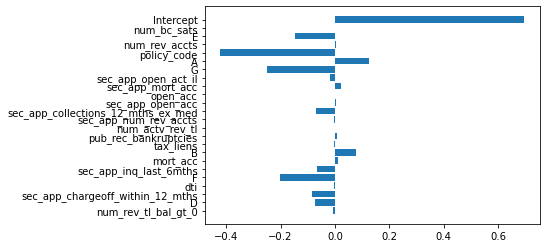

In [63]:
height = important_variables.Coefficients
bars = important_variables.index
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()

We select the variables which meet our coefficient intervals. This variables will be those which we will include in the models.

In [47]:
final_df = loan.loc[:,['num_rev_tl_bal_gt_0',
 'D',
 'sec_app_chargeoff_within_12_mths',
 'dti',
 'F',
 'sec_app_inq_last_6mths',
 'mort_acc',
 'B',
 'tax_liens',
 'pub_rec_bankruptcies',
 'num_actv_rev_tl',
 'sec_app_num_rev_accts',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_open_acc',
 'open_acc',
 'sec_app_mort_acc',
 'sec_app_open_act_il',
 'G',
 'A',
 'policy_code',
 'num_rev_accts',
 'E',
 'num_bc_sats']]

Lastly, we take the "loan_status" variables from last dataset. We want to keep as well because it is our variable to predict.

In [48]:
final_df['loan_status'] = loan['loan_status']
final_df

,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,tax_liens,pub_rec_bankruptcies,...,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats,loan_status
8,9.0,0,0.0,16.99,0,0.0,2.0,0,0.0,1.0,...,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0,1.0
10,2.0,0,0.0,6.07,0,0.0,0.0,0,0.0,0.0,...,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0,1.0
24,11.0,0,0.0,13.12,0,0.0,4.0,0,0.0,0.0,...,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0,1.0
42,7.0,0,0.0,10.11,0,0.0,0.0,0,0.0,2.0,...,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0,1.0
91,1.0,0,0.0,10.86,0,0.0,1.0,0,0.0,0.0,...,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,7.0,1,0.0,27.08,0,0.0,0.0,0,0.0,0.0,...,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0,1.0
421089,8.0,0,0.0,23.69,0,0.0,1.0,1,0.0,0.0,...,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0,0.0
421092,6.0,1,0.0,30.90,0,0.0,0.0,0,0.0,1.0,...,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0,0.0
421093,7.0,0,0.0,27.19,0,0.0,0.0,0,0.0,0.0,...,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0,0.0


We save the cleaned dataset, because it will be used to fit the different models.

In [49]:
final_df.to_csv('loan_lasso.csv')